### Setup

Optional (if you prefer to use absolute paths rather than relative):

In [1]:
from utils import use_absolute_paths
use_absolute_paths()

Inputs and outputs (again, tagged "parameters":

In [2]:
protein_levels_path = 'data/clean/protein_levels.csv'
qc_report_path = 'reports/proteins_failing_qc.csv'

### Exploration and QC

In [3]:
from pandas import read_csv

In [4]:
data = read_csv(protein_levels_path, index_col=0)
data

,Patient_1,Patient_2,Healthy_Control_1,Healthy_Control_2
Protein 1,1.6,1.2,1.6,1.0
Protein 2,1.5,1.3,1.0,NaN
Protein 3,NaN,1.7,NaN,NaN


We could remove And remove patients with more than proteins that have missing measurements for >= 75% of patients: 

In [5]:
qc_pass  = data.isnull().mean(axis=1) < 0.75

In [6]:
failing_qc = data.loc[~qc_pass]
failing_qc

,Patient_1,Patient_2,Healthy_Control_1,Healthy_Control_2
Protein 3,NaN,1.7,NaN,NaN


In [7]:
failing_qc.to_csv(qc_report_path)

In [8]:
data_ok = data.loc[qc_pass]

And then look at the distribution:

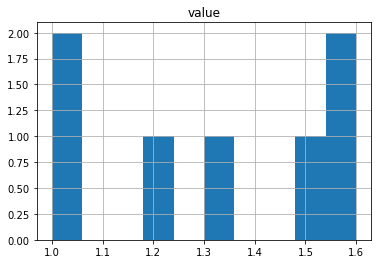

In [9]:
%matplotlib inline
data_ok.melt().hist();

### Randomization and seed

Some analyses may note be easily replicable if the algorithm relay on randomization. For example if we were to choose a random sample:

In [10]:
from random import choice

data[choice(data.columns)]

Protein 1    1.0
Protein 2    NaN
Protein 3    NaN
Name: Healthy_Control_2, dtype: float64

we would likely get a non-fully replicable build. The value obtained in the pipeline could be:

In [11]:
data[choice(data.columns)]

Protein 1    1.2
Protein 2    1.3
Protein 3    1.7
Name: Patient_2, dtype: float64

to prevent this one could set an arbitrary seed if replicability is critical:

In [12]:
from random import seed

seed(0)
data[choice(data.columns)]

Protein 1    1.0
Protein 2    NaN
Protein 3    NaN
Name: Healthy_Control_2, dtype: float64